In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [6]:
df=pd.read_excel("C:/Users/Rehaman shaik/Desktop/data science practice session/assisgments/forecasting/CocaCola_Sales_Rawdata.xlsx")
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [7]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [8]:
df.shape

(42, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 804.0+ bytes


In [10]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [11]:
#Coverting Quarter Years with Quarter Start Date Year (Date Month and Year)

In [13]:
df['Quarter_Year'] = df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x))
df

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [14]:
#Extracting the Quarters and putting in column

In [16]:
df['Date'] = (
    pd.to_datetime(
        df['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
,dayfirst=True))
df

C:\Users\Rehaman shaik\AppData\Local\Temp\ipykernel_9968\1459554453.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(


,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [18]:

df['Quarters'] = df['Quarter'].str[:2]
df

,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2


In [19]:
#creating dummies

In [20]:
dummy=pd.DataFrame(pd.get_dummies(df["Quarters"]))
df1=pd.concat([df, dummy.astype(int)],axis=1)
df1

,Quarter,Sales,Quarter_Year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,0,1,0,0


In [21]:
df1.drop(['Quarter','Quarter_Year'] , axis =1, inplace = True)
df1.head()

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0


In [22]:
#Separating Month and Year into Separate Column for Visualization and removing meaningful insight of the data

In [23]:
df["Date"]=pd.to_datetime(df.Date,format="%b_%y")
df["month"]=df.Date.dt.strftime("%b")
df["year"]=df.Date.dt.strftime("%Y")
df

,Quarter,Sales,Quarter_Year,Date,Quarters,month,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,1986
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,1986
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,1986
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,1986
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,1987
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,Apr,1987
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,Jul,1987
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,Oct,1987
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,Jan,1988
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,Apr,1988


In [24]:
#setting date as index

In [25]:
df1.set_index('Date',inplace=True)
df1.index.year

Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988, 1988,
       1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991, 1991, 1991,
       1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994, 1994, 1994, 1994,
       1995, 1995, 1995, 1995, 1996, 1996],
      dtype='int32', name='Date')

In [26]:
df1['t']=np.arange(1,len(df1)+1)
df1['t_square'] = df1['t'] ** 2

In [27]:
#data visualisation

<Axes: xlabel='month', ylabel='year'>

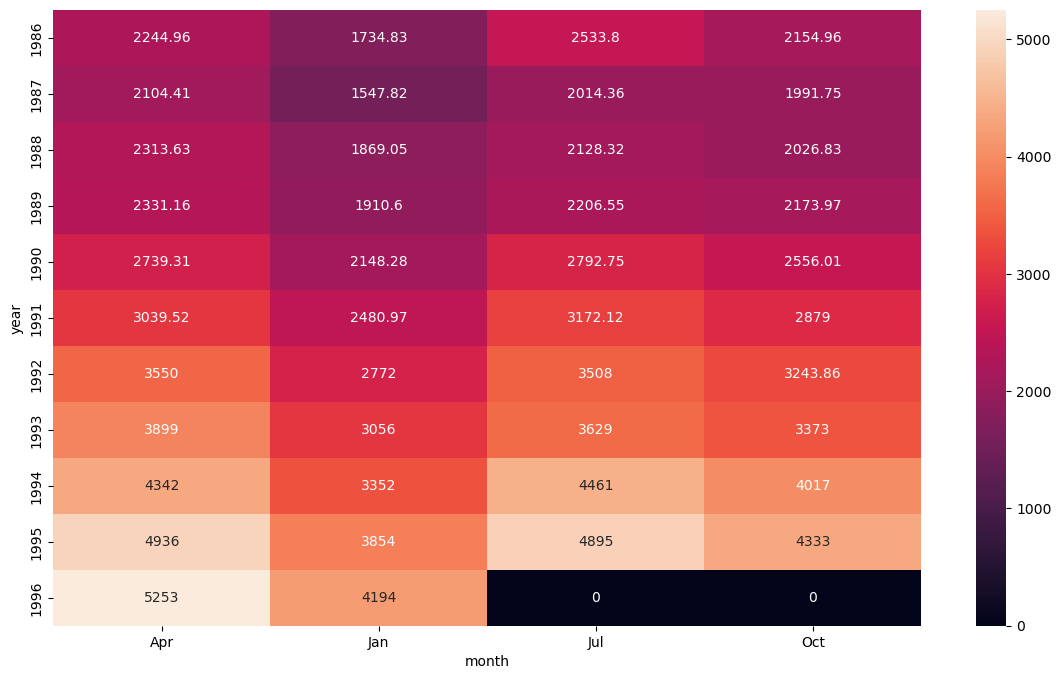

In [28]:
plt.figure(figsize=(14,8))
heatmap_y_month = pd.pivot_table(data=df,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

In [29]:
#line plot

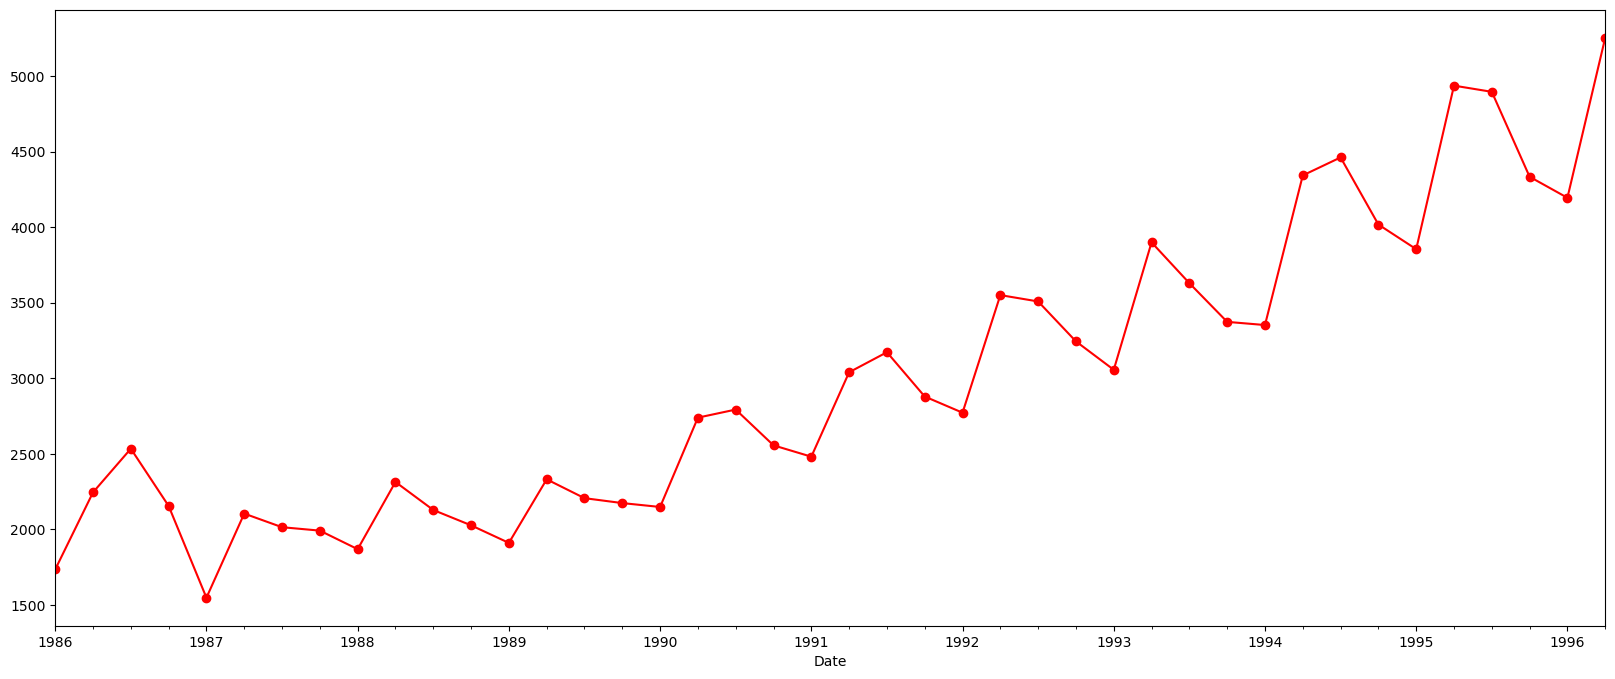

In [30]:
df1['Sales'].plot(figsize=(20, 8),color='red',marker='o')
plt.show()

In [31]:
#Box Plot of Each Year by Quaterly Intervals

<Axes: xlabel='month', ylabel='Sales'>

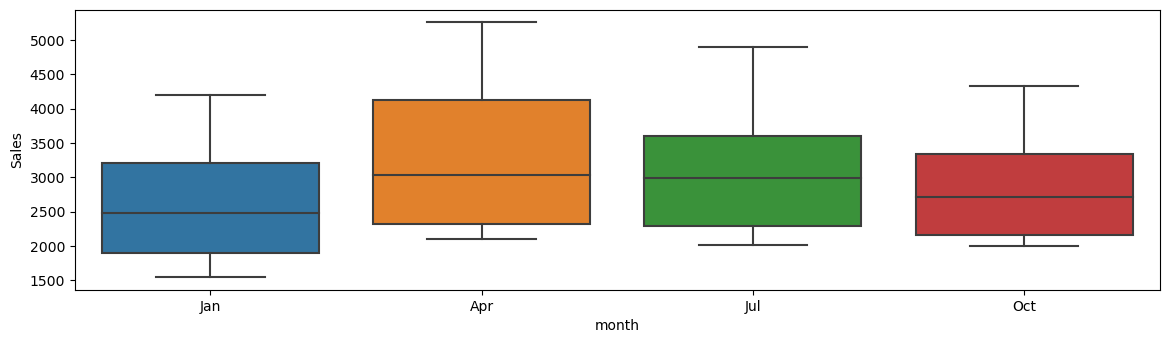

In [33]:
plt.figure(figsize=(14,8))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=df)

<Axes: xlabel='year', ylabel='Sales'>

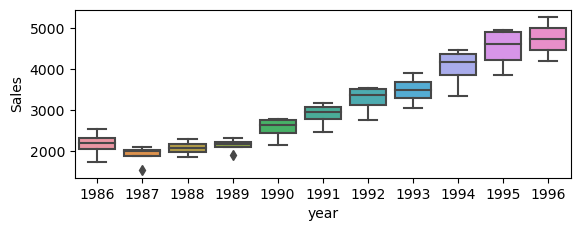

In [34]:
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=df)

C:\Users\Rehaman shaik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


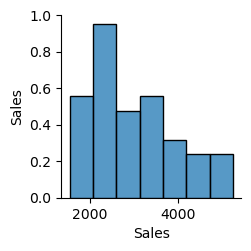

In [35]:
sns.pairplot(df)

In [36]:
#spliting data

In [37]:
train=df1.head(34)
test=df1.tail(8)

In [38]:
#implementing the forecast models


In [39]:
#linear model
linear_model=smf.ols('Sales ~ t',data=train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean(np.array(test['Sales'])-np.array(pred_linear))**2)
rmse_linear

590.1615528800266

In [40]:
#exponential
Exp = smf.ols('np.log(Sales) ~ t', data=train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(test['Sales']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

564.9850937274139

In [42]:
# Quadratic
Quad = smf.ols('Sales ~ t + t_square', data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[['t', 't_square']]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales']) - np.array(pred_Quad))**2))
rmse_Quad

437.7455637558582

In [43]:
# Additive seasonality
add_sea = smf.ols('Sales ~ Q1 + Q2 + Q3 + Q4', data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales']) - np.array(pred_add_sea))**2))
rmse_add_sea


1870.1899069853293

In [44]:
# Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales ~ t + t_square + Q1 + Q2 + Q3 + Q4', data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['t', 't_square', 'Q1', 'Q2', 'Q3', 'Q4']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales']) - np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

257.67172565362995

In [45]:
# Multiplicative Seasonality
Mul_sea = smf.ols('np.log(Sales) ~ Q1 + Q2 + Q3 + Q4', data=train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test[['Q1', 'Q2', 'Q3', 'Q4']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1940.8042499186554

In [46]:
# Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('np.log(Sales) ~ t + Q1 + Q2 + Q3 + Q4', data=train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test[['t', 'Q1', 'Q2', 'Q3', 'Q4']]))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales']) - np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea


400.4200458436026

In [48]:
# Compare the results
data = {"MODEL": pd.Series(["rmse_linear", "rmse_Exp", "rmse_Quad", "rmse_add_sea", "rmse_add_sea_quad", "rmse_Mult_sea", "rmse_Mult_add_sea"]),
        "RMSE_Values": pd.Series([rmse_linear, rmse_Exp, rmse_Quad, rmse_add_sea, rmse_add_sea_quad, rmse_Mult_sea, rmse_Mult_add_sea])}
data

{'MODEL': 0          rmse_linear
 1             rmse_Exp
 2            rmse_Quad
 3         rmse_add_sea
 4    rmse_add_sea_quad
 5        rmse_Mult_sea
 6    rmse_Mult_add_sea
 dtype: object,
 'RMSE_Values': 0     590.161553
 1     564.985094
 2     437.745564
 3    1870.189907
 4     257.671726
 5    1940.804250
 6     400.420046
 dtype: float64}

In [50]:
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,590.161553
1,rmse_Exp,564.985094
2,rmse_Quad,437.745564
3,rmse_add_sea,1870.189907
4,rmse_add_sea_quad,257.671726
5,rmse_Mult_sea,1940.804250
6,rmse_Mult_add_sea,400.420046


In [51]:
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,257.671726
6,rmse_Mult_add_sea,400.420046
2,rmse_Quad,437.745564
1,rmse_Exp,564.985094
0,rmse_linear,590.161553
3,rmse_add_sea,1870.189907
5,rmse_Mult_sea,1940.804250


In [55]:
'''By observing the above RMSE values we can say 
that Additive Seasonality Quadratic is 
the best model to forecast the above data set'''

'By observing the above RMSE values we can say \nthat Additive Seasonality Quadratic is \nthe best model to forecast the above data set'